<a href="https://colab.research.google.com/github/sorielkobayashi/Custom-Colab-Notebooks/blob/main/even-faster-stable-diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Even Faster Stable Diffusion** by [dotRelith](https://github.com/dotRelith/even-faster-stable-diffusion)
**Step-By-Step Guide:**
*   First-time Installation
  1.   Mount Google Drive
  2.   Install AUTOMATIC1111-web-ui
  3.   MODEL DOWNLOAD/LOAD
  4.   Start AUTOMATIC1111-web-ui

*   Subsequent Installations
  1.   Mount Google Drive
  2.   MODEL DOWNLOAD/LOAD
  3.   Start AUTOMATIC1111-web-ui

Note: If you have enough space in your google drive you can put your own models inside the default folder (/content/gdrive/MyDrive/stable-diffusion-webui/models/Stable-diffusion) that everything will work normally.


**IMPORTANT FOR BEGGINERS**<br>
To execute the code in Colab as a beginner, follow the arrow in the image and click on the designated area. You will need to repeat this process for each code block that you want to run. If you are unsure of which blocks to run, refer to the **step-by-step guide** for guidance.
<br>
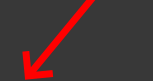

In [1]:
#@markdown # Mount Google Drive
from IPython.display import clear_output
from google.colab import drive
from google.colab import output
from subprocess import getoutput
import os
import time
import fileinput
import sys

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#@markdown # Check GPU
#@markdown (Just for curiosity)
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15109 MiB, 15109 MiB


In [3]:
#@markdown # Install AUTOMATIC1111-web-ui
#markdown > Stable Diffusion github repo was suspended, you'll have to redownload Stable Diffusion fow you to get latest version.<br>I suggest that you delete the old files.
#!git clone https://gitgud.io/AUTOMATIC1111/stable-diffusion-webui.git /content/gdrive/MyDrive/stable-diffusion-webui
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git /content/gdrive/MyDrive/stable-diffusion-webui
clear_output()
print('[1;32mDONE!\033[0m')

DONE!


In [5]:
#@markdown # Model Download/Load
#@markdown ---
#@markdown > Change this if you want to use another path to store all your models(.ckpt files).<br>( Leave empty to use Colab HardDrive )
CKPT_directory_path = '/content/gdrive/MyDrive/AI/models/Stable-diffusion' #@param {type:"string"}
#@markdown > Path to the CKPT you want to load in by default<br>( Include .ckpt at the end )<br>(Ex: "/content/models/v1-5-pruned.ckpt")
default_CKPT_name = '/content/gdrive/MyDrive/AI/models/Stable-diffusion/ixquare2.ckpt' #@param {type:"string"}
#@markdown ---
#@markdown > Common Models to download.<br>(Check boxes to download)
AnythingV3 = False #@param {type:"boolean"}
StableDiffusion_v1_5 = False #@param {type:"boolean"}
WaifuDiffusion_v1_3 = False #@param {type:"boolean"}
OpenJourney_v4 = False #@param {type:"boolean"}
#@markdown ---
#@markdown > Direct model link<br>(Leave empty to ignore)
FirstCustomModel = '' #@param {type:"string"}
SecondCustomModel = '' #@param {type:"string"}
ThirdCustomModel = '' #@param {type:"string"}

if CKPT_directory_path == '':
  CKPT_directory_path = '/content/models'
  if not os.path.exists(CKPT_directory_path):
    os.makedirs(CKPT_directory_path)

if default_CKPT_name != '':
  default_CKPT_name = "--ckpt " + default_CKPT_name

%cd "$CKPT_directory_path"

def download_model(model_url):
  file_name = model_url.rsplit('/', 1)[-1]
  if not os.path.exists(f"{CKPT_directory_path}/{file_name}"):
    !wget "$model_url"

if AnythingV3:
  download_model("https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/Anything-V3.0-pruned.ckpt")
  download_model("https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/Anything-V3.0.vae.pt")
if StableDiffusion_v1_5:
  download_model("https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt")
if WaifuDiffusion_v1_3:
  download_model("https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-float16.ckpt")
if OpenJourney_v4:
  download_model("https://huggingface.co/prompthero/openjourney/resolve/main/mdjrny-v4.ckpt")
if FirstCustomModel:
  download_model(FirstCustomModel)
if SecondCustomModel:
  download_model(SecondCustomModel)
if ThirdCustomModel:
  download_model(ThirdCustomModel)

clear_output()
print('[1;32mALL MODELS DOWNLOADED!\033[0m')

ALL MODELS DOWNLOADED!


In [ ]:
#@markdown #Start AUTOMATIC1111-web-ui
#@markdown --- 
#@markdown <br>
#@markdown <center> You will hear a <b>quack</b> when the notebook is about to start</center>

#@markdown > ALL CREDITS TO '[TheLastBen](https://github.com/TheLastBen)' for the 'UseGradioServer' code
UseGradioServer = True #@param {type:"boolean"}
!git pull

print('[1;32mDOWNLOADING XFORMERS\033[0m')
%pip install -q -U --pre triton
%pip install -q accelerate==0.12.0 transformers ftfy bitsandbytes gradio natsort
%pip install -q https://github.com/brian6091/xformers-wheels/releases/download/0.0.15.dev0%2B4c06c79/xformers-0.0.15.dev0+4c06c79.d20221205-cp38-cp38-linux_x86_64.whl
clear_output()
print('[1;32mXFORMERS DONE!\033[0m')

share = "--share"
if UseGradioServer:
  for line in fileinput.input('/usr/local/lib/python3.8/dist-packages/gradio/blocks.py', inplace=True):
    if line.strip().startswith('self.server_name ='):
        line = '            self.server_name = server_name\n'
    if line.strip().startswith('self.server_port ='):
        line = '            self.server_port = server_port\n'
    sys.stdout.write(line)
  clear_output()
else:
  share = ""
  
  print('[1;32mINSTALLING LOCAL TUNNEL!\033[0m')
  !npm install -g localtunnel
  clear_output()
  print('[1;32mINSTALLED LOCAL TUNNEL!\033[0m')

  !nohup lt --port 7860 > /content/srv.txt &  
  time.sleep(2)
  !grep -o 'https[^ ]*' /content/srv.txt > /content/srvr.txt
  time.sleep(2)  
  srv = getoutput('cat /content/srvr.txt')
  for line in fileinput.input('/usr/local/lib/python3.8/dist-packages/gradio/blocks.py', inplace=True):
    if line.strip().startswith('self.server_name ='):
        line = f'            self.server_name = "{srv[8:]}"\n'
    if line.strip().startswith('self.server_port ='):
        line = '            self.server_port = 443\n'
    if line.strip().startswith('self.protocol = "https"'):
        line = '            self.protocol = "https"\n'
    if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
        line = ''    
    if line.strip().startswith('else "http"'):
        line = ''              
    sys.stdout.write(line)
          
  !sed -i '13s@.*@    "PUBLIC_SHARE_TRUE": "[32mConnected\\033[0m",@' /usr/local/lib/python3.8/dist-packages/gradio/strings.py
    
  !rm /content/srv.txt
  !rm /content/srvr.txt
  #!grep "server_name=\"https://" -q  /content/gdrive/MyDrive/stable-diffusion-webui/webui.py && sed -i "s@server_name=\"https://@server_name=\"$srv\"\n#https://@" /content/gdrive/MyDrive/stable-diffusion-webui/webui.py|| sed -i "s@shared.demo = modules.ui.create_ui()@shared.demo = modules.ui.create_ui()\n        server_name=\"$srv\"@" /content/gdrive/MyDrive/stable-diffusion-webui/webui.py
  #!sed -i '/^#https:\/\//d' /content/gdrive/MyDrive/stable-diffusion-webui/webui.py

%cd /content/gdrive/MyDrive/stable-diffusion-webui/
!sed -i 's@map_location=map_location@map_location=\"cuda:0\"@' /content/gdrive/MyDrive/stable-diffusion-webui/modules/sd_models.py

output.eval_js('new Audio("https://cdn.pixabay.com/download/audio/2022/03/10/audio_5adfa08633.mp3?filename=075176_duck-quack-40345.mp3").play()')
!python launch.py --enable-insecure-extension-access --xformers --ckpt-dir "$CKPT_directory_path" $default_CKPT_name --deepdanbooru --precision full --no-half $share

/content/gdrive/MyDrive/stable-diffusion-webui
Python 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
Commit hash: 874b975bf8438b2b5ee6d8540d63b2e2da6b8dbd
Installing requirements for Web UI
Launching Web UI with arguments: --enable-insecure-extension-access --xformers --ckpt-dir /content/gdrive/MyDrive/AI/models/Stable-diffusion --ckpt /content/gdrive/MyDrive/AI/models/Stable-diffusion/ixquare2.ckpt --deepdanbooru --precision full --no-half --share
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Loading weights [f8480b4f] from /content/gdrive/MyDrive/AI/models/Stable-diffusion/ixquare2.ckpt
Applying xformers cross attention optimization.
Textual inversion embeddings loaded(0): 
Model loaded.
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://06aec40a-9ce5-4866.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
  2% 1/50 